# clearpet



> **dataset: https://www.kaggle.com/datasets/chetankv/dogs-cats-images**



In [41]:
#import libraries

import numpy as np 
import pandas as pd 
import tensorflow
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### data preproc

In [42]:
#we will use a subset of the data for training and validation, and evaluate the performance of our model on a separate test set.
img_size = 150
batch_size = 64

train_datagen = ImageDataGenerator(rescale=1/255., 
                                    rotation_range=30,
                                    horizontal_flip=True, 
                                    width_shift_range=0.1, 
                                    height_shift_range=0.1, 
                                    validation_split=0.2)
             #use shifting,rotating,fliping methods in order to avoid overfitting.                       

test_datagen = ImageDataGenerator(rescale=1/255.)

train_generator = train_datagen.flow_from_directory('dataset/training_set',
                                                    target_size=(img_size, img_size),
                                                    batch_size=batch_size, 
                                                    shuffle=True, 
                                                    class_mode='binary',
                                                    subset='training')

val_generator = train_datagen.flow_from_directory('dataset/training_set',
                                                  target_size=(img_size, img_size),
                                                  batch_size=batch_size, 
                                                  shuffle=False, 
                                                  class_mode='binary',
                                                  subset='validation')

test_generator = test_datagen.flow_from_directory('dataset/training_set',
                                                  target_size=(img_size, img_size),
                                                  batch_size=batch_size, 
                                                  shuffle=False, 
                                                  class_mode='binary')


Found 6400 images belonging to 2 classes.
Found 1600 images belonging to 2 classes.
Found 8000 images belonging to 2 classes.


### build and train

In [43]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input

In [44]:
model = Sequential()

model.add(Conv2D(16,(3,3), input_shape = (img_size,img_size,3), activation = 'relu',padding='same'))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3), input_shape = (img_size,img_size,3), activation = 'relu',padding='same'))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3), input_shape = (img_size,img_size,3), activation = 'relu',padding='same'))
model.add(MaxPooling2D())

model.add(Conv2D(128,(3,3), input_shape = (img_size,img_size,3), activation = 'relu',padding='same'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(512,activation = 'relu' ))
model.add(Dense(1,activation = 'sigmoid' ))

In [45]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
#To prevent over fitting we will stop the learning after 10 epochs and val_loss value not decreased

earlystop = EarlyStopping(patience=5)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
#We will reduce the learning rate when then accuracy not increase for 2 steps

callbacks = [earlystop, learning_rate_reduction]

In [46]:
model.compile(optimizer = 'adam',loss= 'binary_crossentropy',metrics= ['accuracy'])
history = model.fit(train_generator,validation_data = val_generator,epochs = 10, callbacks = callbacks)

Epoch 1/10
100/100 [==============================] - 111s 1s/step - loss: 0.6880 - accuracy: 0.5512 - val_loss: 0.6625 - val_accuracy: 0.5931 - lr: 0.0010
Epoch 2/10
100/100 [==============================] - 108s 1s/step - loss: 0.6479 - accuracy: 0.6242 - val_loss: 0.6294 - val_accuracy: 0.6538 - lr: 0.0010
Epoch 3/10
100/100 [==============================] - 106s 1s/step - loss: 0.5872 - accuracy: 0.6853 - val_loss: 0.5652 - val_accuracy: 0.7069 - lr: 0.0010
Epoch 4/10
100/100 [==============================] - 107s 1s/step - loss: 0.5518 - accuracy: 0.7217 - val_loss: 0.5511 - val_accuracy: 0.7188 - lr: 0.0010
Epoch 5/10
100/100 [==============================] - 106s 1s/step - loss: 0.5313 - accuracy: 0.7327 - val_loss: 0.5350 - val_accuracy: 0.7344 - lr: 0.0010
Epoch 6/10
100/100 [==============================] - 106s 1s/step - loss: 0.5174 - accuracy: 0.7467 - val_loss: 0.5311 - val_accuracy: 0.7225 - lr: 0.0010
Epoch 7/10
100/100 [==============================] - 106s 1s/st

In [48]:
#saving model
model.save_weights("model.h5")

### 5. Model Performance

<function matplotlib.pyplot.show(close=None, block=None)>

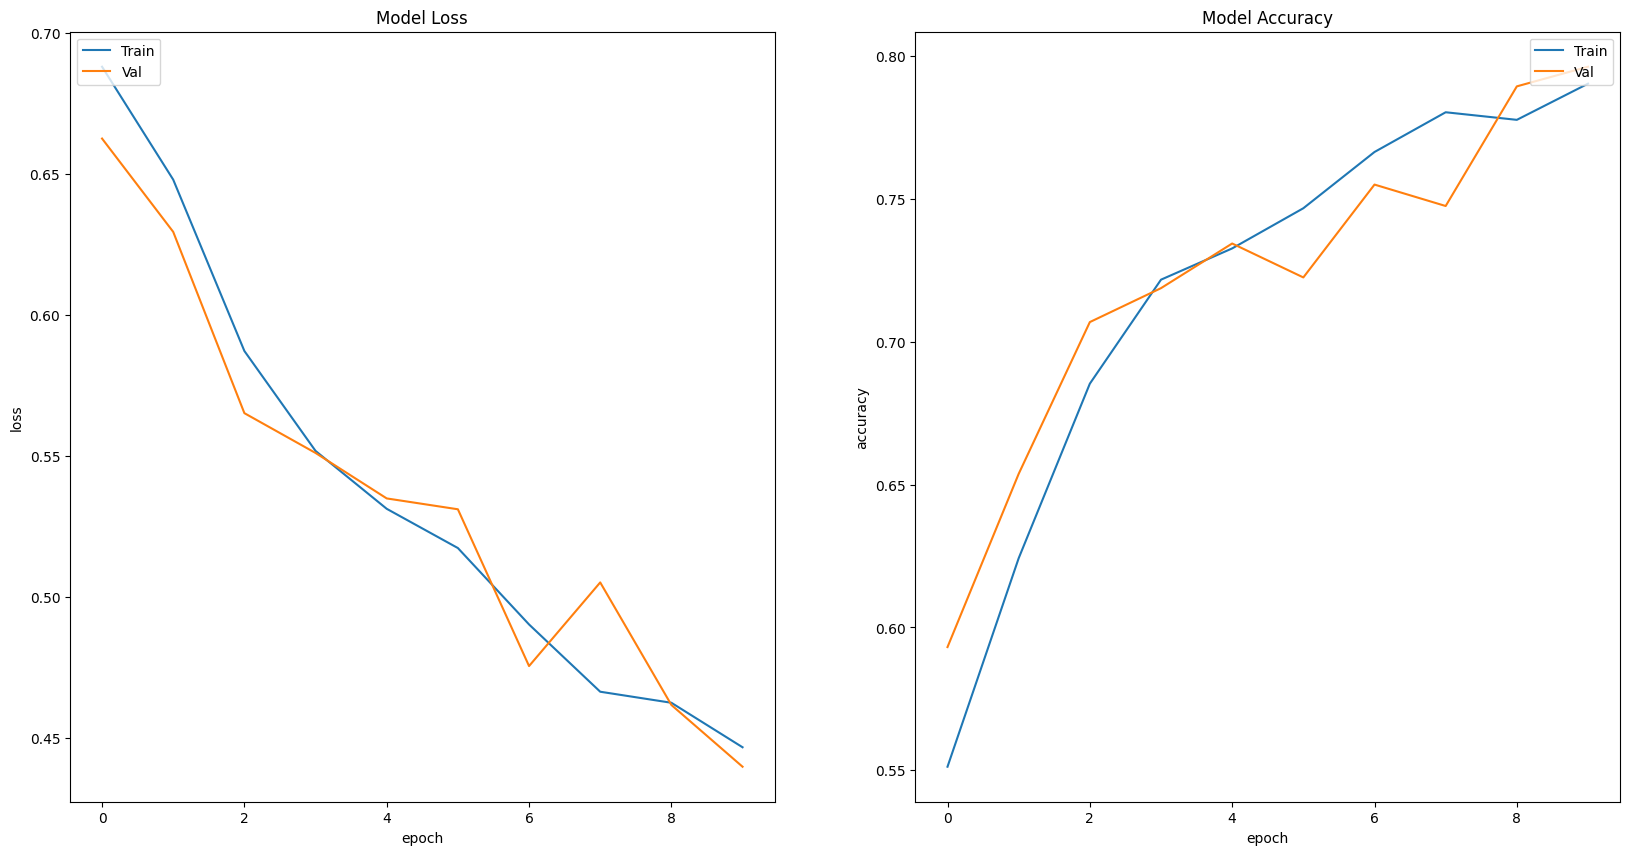

In [49]:
plt.figure(figsize=(20,10))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train','Val'], loc = 'upper left')

plt.subplot(1, 2, 2)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Val'], loc = 'upper right')
plt.show

### 6. Model Evaluation

In [50]:
classes = test_generator.classes
y_pred = model.predict(test_generator)
y_pred[y_pred<=0.5] = 0
y_pred[y_pred>0.5] = 1

125/125 [==============================] - 28s 224ms/step


In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [52]:
confusion_matrix(classes,y_pred)

array([[3473,  527],
       [ 907, 3093]])

In [53]:
print(f" Accuracy is {round(accuracy_score(classes,y_pred)*100,2)} %")

 Accuracy is 82.08 %


In [64]:
#making a single pred
import numpy as np
from keras.preprocessing import image

#single pred
test_image = image.load_img('dataset/single_prediction/cat_or_dog_2.jpg', target_size = (150, 150))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
train_generator.class_indices
if result[0][0] > 0.5:
  prediction = 'dog'
else:
  prediction = 'cat'

print(prediction)

1/1 [==============================] - 0s 40ms/step
cat
